In [2]:
#isolate region of ssrS 3055983	3056165
coord1=3055984
coord2=3056164
i=0
with open('output.RNA-RNA_operon_noChim.bed', 'r') as rr, open('ssrS_gene.bed','w') as out: #change name output file
    for line in rr:
        sub=line.split()
        if sub[0]=='track':
            continue
        
        if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[2]) <=coord2:   
            out.write(f'{sub[0]}\t{sub[1]}\t{sub[2]}\n')

In [3]:
a='60M30S'
cigar_blocks = a.split('N')
print(len(cigar_blocks) - 1)


0


In [4]:
with open('read_1_toGenome_Chimeric.out.junction','r') as cj, open('chim_ssrS.bed','w') as co:
    for line in cj:
        if line.startswith('track'):
            continue
        sub=line.split()
        if 3055983<=int(sub[1])<=3056165 and 3055983<=int(sub[4])<=3056165:
            co.write(f'{sub[1]}\t{sub[4]}\n')
            
with open('read_2_toGenome_Chimeric.out.junction','r') as cj, open('chim_ssrS.bed','a') as co:
    for line in cj:
        if line.startswith('track'):
            continue
        sub=line.split()
        if 3055983<=int(sub[1])<=3056165 and 3055983<=int(sub[4])<=3056165:
            co.write(f'{sub[1]}\t{sub[4]}\n')

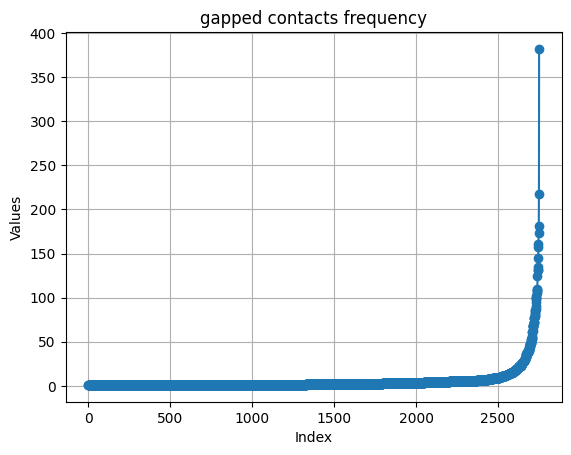

In [119]:
import pandas as pd
from collections import Counter

with open('ssrS_gene.bed',"r") as ppp:
    dicpos={}
    for line in ppp:
        sub=line.split()
        contact=(sub[1], sub[2])
        
        if contact in dicpos.keys():
            dicpos[contact]+=1
        else:
            dicpos[contact]=1

import matplotlib.pyplot as plt

# Extract the values from the dictionary
values = sorted(dicpos.values())
datatoplot=[]
for i in values:
    if not 0<i<0:
        datatoplot.append(i)

# Plotting the values
plt.plot(datatoplot, marker='o')
plt.title('gapped contacts frequency')
plt.ylabel('Values')
plt.xlabel('Index')
plt.grid(True)
plt.show()

with open('filter_contacts_ssrS.bed', 'w') as oop:
    for i in dicpos.keys():
        if dicpos[i] >= 20: ###################################
            oop.write(f'{i[0]}\t{i[1]}\n')


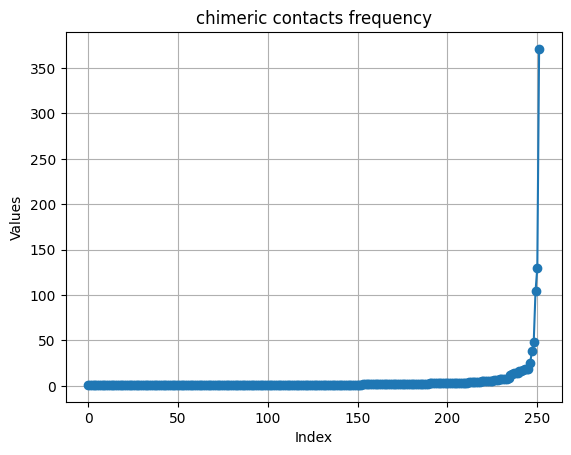

In [4]:

import pandas as pd
from collections import Counter

with open('chim_ssrS.bed',"r") as ppp:
    dicpos={}
    for line in ppp:
        sub=line.split()
        contact=(sub[0], sub[1])
        
        if contact in dicpos.keys():
            dicpos[contact]+=1
        else:
            dicpos[contact]=1

import matplotlib.pyplot as plt

# Extract the values from the dictionary
values = sorted(dicpos.values())
datatoplot=[]
for i in values:
    if not 0<i<0:
        datatoplot.append(i)

# Plotting the values
plt.plot(datatoplot, marker='o')
plt.title('chimeric contacts frequency')
plt.ylabel('Values')
plt.xlabel('Index')
plt.grid(True)
plt.show()

with open('filter_contacts_chim_ssrS.bed', 'w') as oop:
    for i in dicpos.keys():
        if dicpos[i] >= 10: ###################################
            oop.write(f'{i[0]}\t{i[1]}\n')


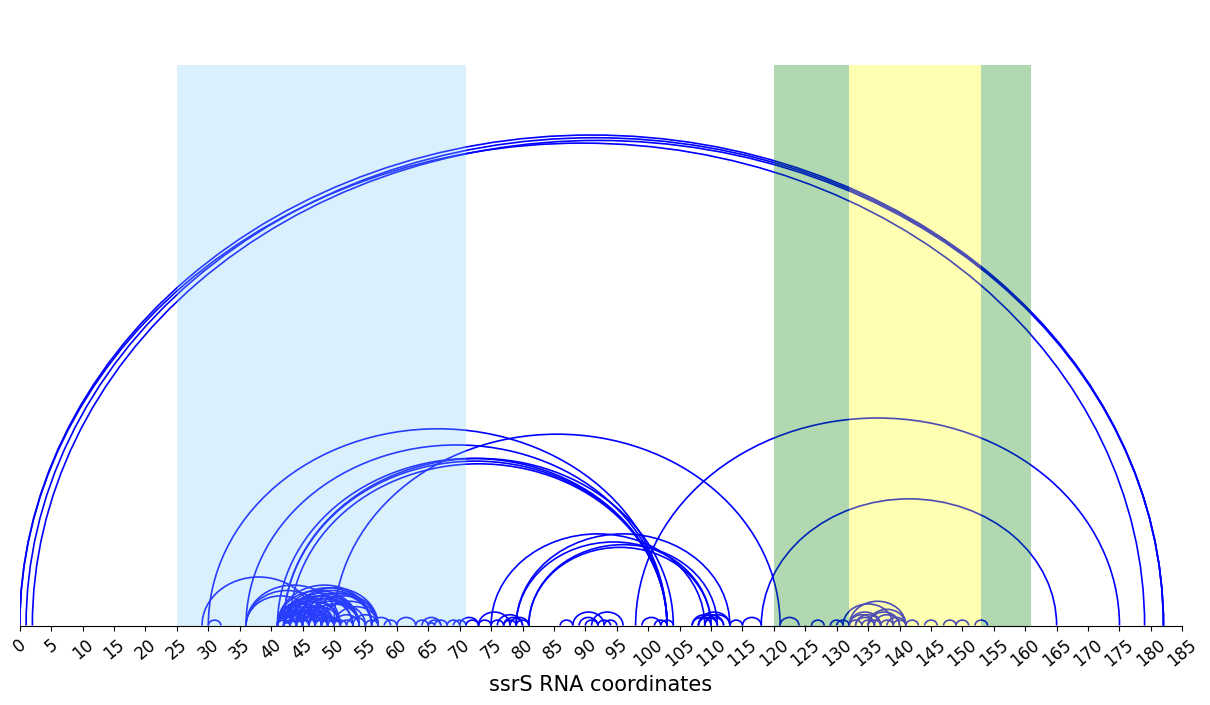

In [2]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define the file name
filename = 'filter_contacts_chim_ssrS.bed'

# Read the coordinates from the file, skipping the first line
coordinates = []
with open(filename, 'r') as file:
    
    for line in file:
        parts = line.strip().split()
        start = int(parts[0]) -3055983  
        end = int(parts[1]) -3055983  
        coordinates.append((start, end))
        
with open('filter_contacts_ssrS.bed', 'r') as files:
    
    for line in files:
        parts = line.strip().split()
        start = int(parts[0]) -3055983  
        end = int(parts[1]) -3055983  
        coordinates.append((start, end))


# Extract start and end coordinates
starts, ends = zip(*coordinates)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

def get_arc_height(length):
        return length/2
    
for i, (start, end) in enumerate(coordinates):
    mid = (start + end) / 2
    arc_length = end - start
    height = get_arc_height(arc_length)  # Set height based on arc length
    color = 'blue'  # Determine color based on arc length
    
    # Apply a vertical offset to separate arcs
    offset = i * 15  # Adjust this value to control the separation
    arc = patches.Arc([mid, 0], arc_length, height*3.5, angle=0, theta1=0, theta2=180, color=color, linewidth=1.2, alpha=1)
    ax.add_patch(arc)

# Customize the plot

ax.set_ylim(0, 200)  # Ensure arcs are properly scaled vertically
ax.set_xlabel("ssrS RNA coordinates", fontsize=15)
ax.set_yticks([])
ax.spines['left'].set_color('none')       # Hide the left y-axis line
ax.spines['right'].set_color('none')      # Hide the right y-axis line
ax.spines['top'].set_color('none')        # Hide the top x-axis line
ax.spines['bottom'].set_position('zero')  # Position the x-axis at y=0
plt.xticks(list(range(0, 190, 5)), fontsize=12, rotation=40)

rect = patches.Rectangle((25, 0), 46, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='LIGHTSKYBLUE', alpha=0.3)
rect2 = patches.Rectangle((120, 0), 12, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='green', alpha=0.3)
rect3 = patches.Rectangle((132, 0), 21, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='yellow', alpha=0.3)
rect4 = patches.Rectangle((153, 0), 8, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='green', alpha=0.3)
ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)


plt.show()

        

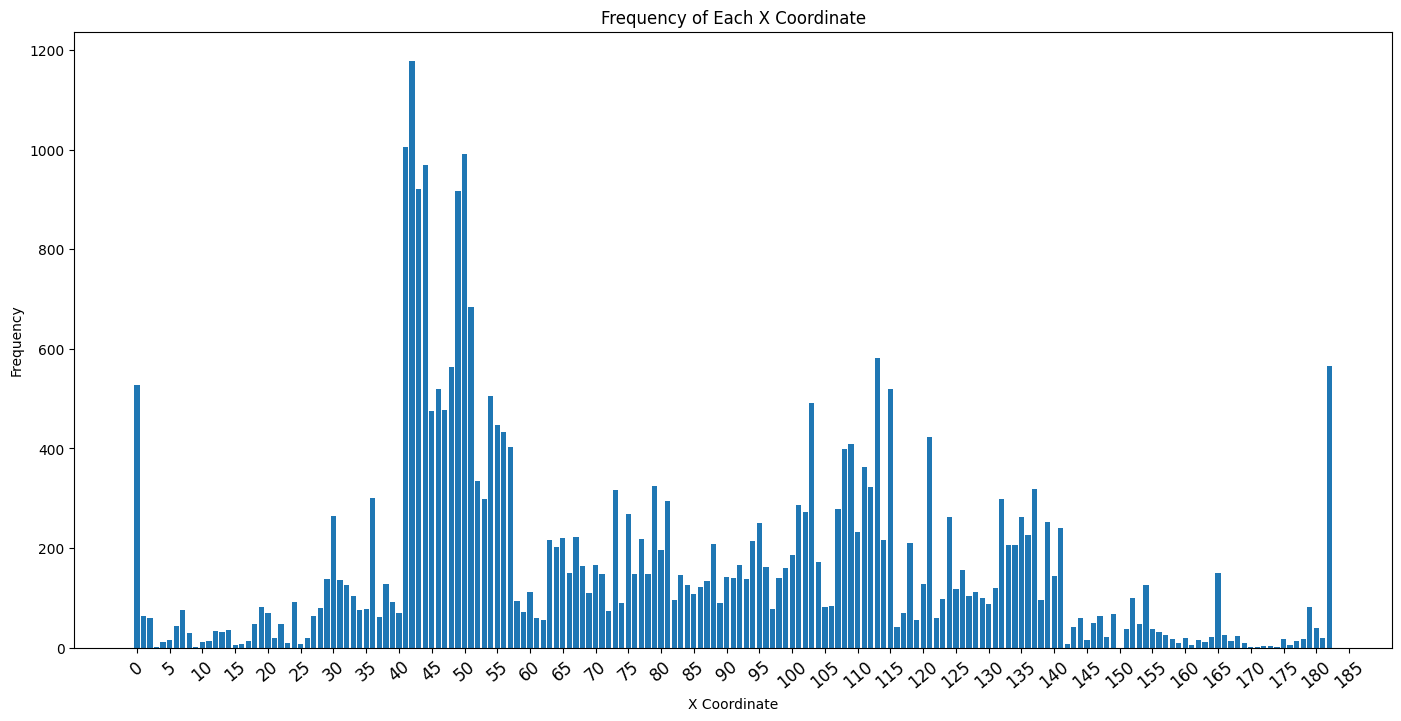

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Read the file and extract both coordinates as x values
x_coords = []

with open('ssrS_gene.bed', 'r') as file:
    for line in file:
        o,x1, x2 = map(str, line.split())
        x_coords.extend([int(x1)-3055983, int(x2)-3055983]) 
        
with open('chim_ssrS.bed', 'r') as file:
    for line in file:
        x1, x2 = map(int, line.split())
        x_coords.extend([x1-3055983, x2-3055983])

# Count the occurrences of each x coordinate
x_counts = Counter(x_coords)

# Prepare the data for the bar plot
x_values = list(x_counts.keys())
y_values = list(x_counts.values())

# Increase the figure size
plt.figure(figsize=(17, 8))  # width: 12 inches, height: 6 inches

# Create the bar plot
plt.bar(x_values, y_values)
plt.xticks(list(range(0, 190, 5)), fontsize=12, rotation=40)
#plt.ylim(0,200)


# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Frequency')
plt.title('Frequency of Each X Coordinate')

# Display the plot
plt.show()


In [37]:
#ssrS_gene.bed
#filter_contacts_ssrS.bed
with open('ssrS_gene.bed', 'r') as file1, open('chim_ssrS.bed', 'r') as file2, open('contactmap.bed', 'w') as out:
    offset=3055983
    for line in file1:
        sub=line.split()
        if 20<=int(sub[1])-offset<=160 and 20<=int(sub[2])-offset<=160:
            out.write(f"{sub[1]}\t{sub[2]}\n")
            #out.write(line)
    for line in file2:
        sub=line.split()
        if 20<=int(sub[0])-offset<=160 and 20<=int(sub[1])-offset<=160:
            out.write(line)

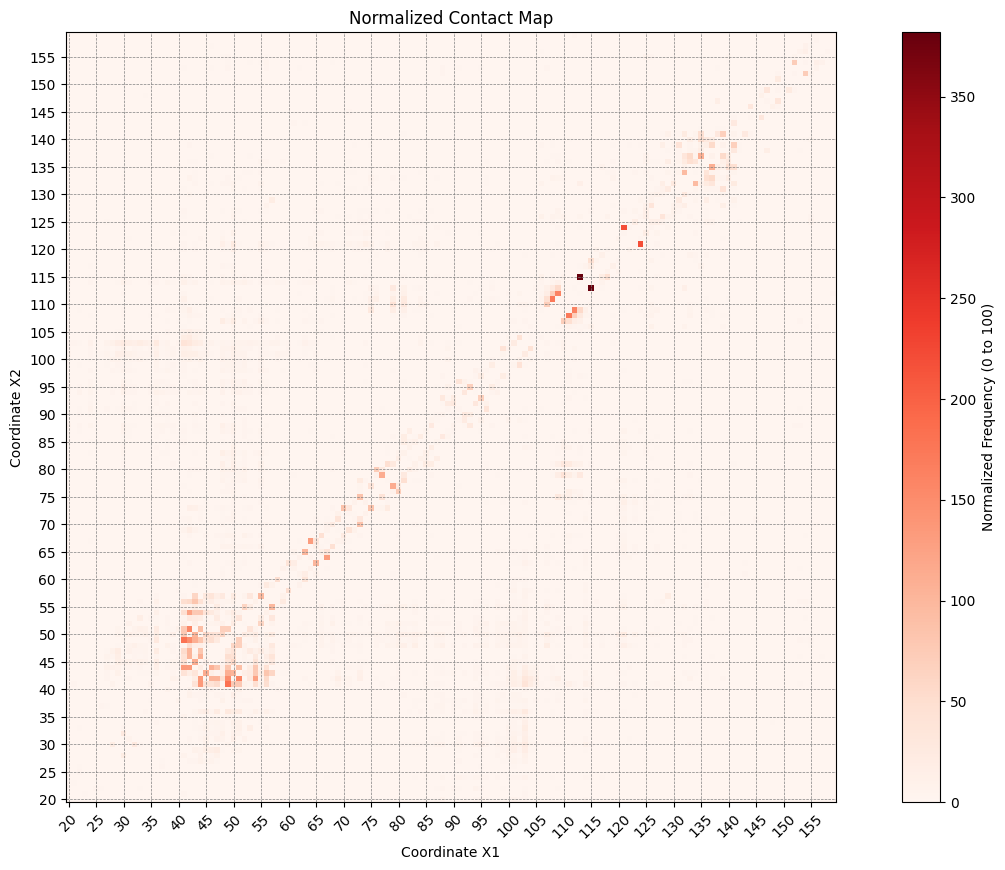

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range and offset for nucleotide coordinates
start, end = 20, 159
offset = 3055983

# Initialize a 141x141 matrix to cover coordinates from 20 to 160
matrix_size = end - start + 1
contact_map = np.zeros((matrix_size, matrix_size), dtype=int)

# Read the file and update the contact map based on the coordinate pairs
with open('contactmap.bed', 'r') as file:
    for line in file:
        x1, x2 = map(str, line.split())
        
        # Adjust indices based on the offset and check if they are within range
        idx1 = int(x1) - offset
        idx2 = int(x2) - offset
        
        if start <= idx1 <= end and start <= idx2 <= end:
            # Adjust to match the contact map index (20 becomes 0, 160 becomes 140)
            contact_map[idx1 - start, idx2 - start] += 1
            contact_map[idx2 - start, idx1 - start] += 1  # Ensure symmetry

# Normalize the contact map by scaling values to the range [0, 100

# Plot the normalized contact map as a heatmap
plt.figure(figsize=(17, 10))
plt.imshow(contact_map, cmap='Reds', interpolation='nearest', origin='lower')

# Add color bar and labels
plt.colorbar(label='Normalized Frequency (0 to 100)')
plt.title('Normalized Contact Map')
plt.xlabel('Coordinate X1')
plt.ylabel('Coordinate X2')
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

# Adjust x and y ticks to correspond to nucleotides 20 to 160
ticks = np.arange(0, matrix_size, 5)
tick_labels = np.arange(start, end + 1, 5)
plt.xticks(ticks=ticks, labels=tick_labels, fontsize=10, rotation=45)
plt.yticks(ticks=ticks, labels=tick_labels, fontsize=10)

# Show the plot
plt.show()


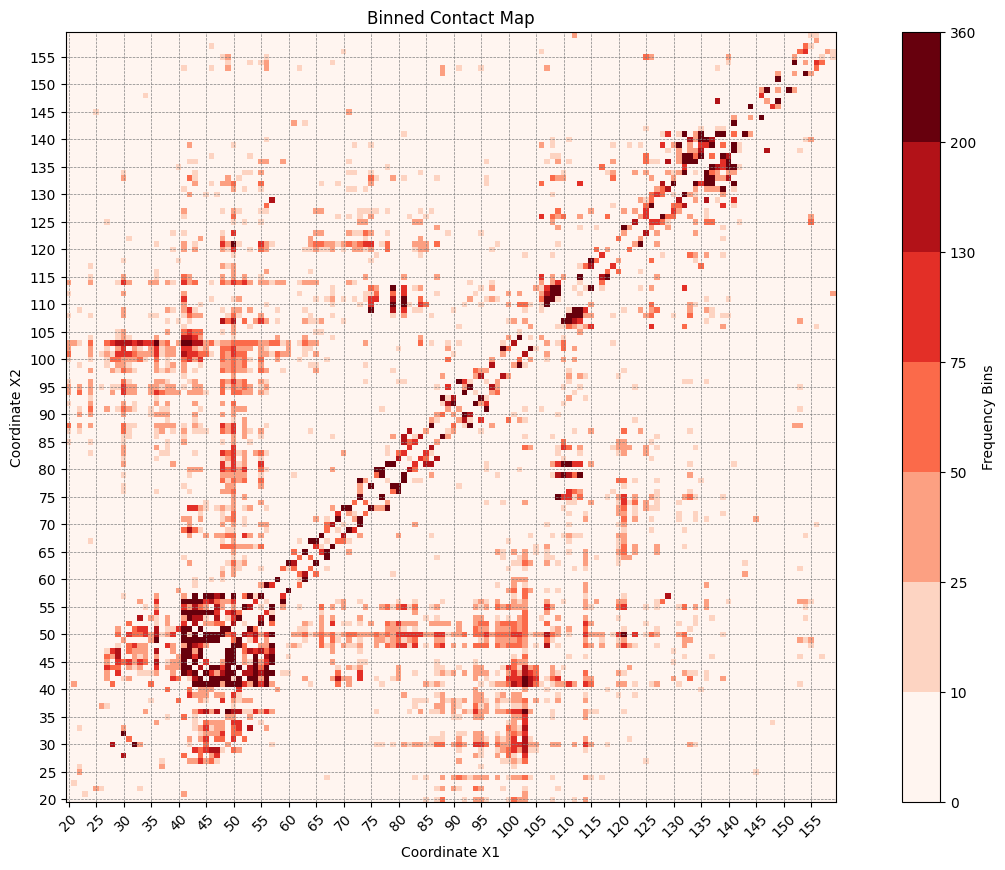

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

# Define the range and offset for nucleotide coordinates
start, end = 20, 159
offset = 3055983

# Initialize a 141x141 matrix to cover coordinates from 20 to 160
matrix_size = end - start + 1
contact_map2 = np.zeros((matrix_size, matrix_size), dtype=int)

# Read the file and update the contact map based on the coordinate pairs
with open('contactmap.bed', 'r') as file:
    for line in file:
        x1, x2 = map(str, line.split())
        
        # Adjust indices based on the offset and check if they are within range
        idx1 = int(x1) - offset
        idx2 = int(x2) - offset
        
        if start <= idx1 <= end and start <= idx2 <= end:
            # Adjust to match the contact map index (20 becomes 0, 160 becomes 140)
            contact_map[idx1 - start, idx2 - start] += 1
            contact_map[idx2 - start, idx1 - start] += 1  # Ensure symmetry

# Define the bins for frequency ranges
bins = [0, 10, 25, 50, 75, 130, 200, 360]

# Create a colormap with a distinct set of colors
cmap = plt.get_cmap('Reds', len(bins) - 1)


# Define BoundaryNorm for color normalization
norm = BoundaryNorm(bins, cmap.N)

# Plot the contact map with the defined color bins
plt.figure(figsize=(17, 10))
img = plt.imshow(contact_map, cmap=cmap, interpolation='nearest', origin='lower', norm=norm)

# Add color bar with labels matching the bins
cbar = plt.colorbar(img, ticks=bins)
cbar.set_label('Frequency Bins')

# Add plot labels and grid
plt.title('Binned Contact Map')
plt.xlabel('Coordinate X1')
plt.ylabel('Coordinate X2')
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

# Adjust x and y ticks to correspond to nucleotides 20 to 160
ticks = np.arange(0, matrix_size, 5)
tick_labels = np.arange(start, end + 1, 5)
plt.xticks(ticks=ticks, labels=tick_labels, fontsize=10, rotation=45)
plt.yticks(ticks=ticks, labels=tick_labels, fontsize=10)

# Show the plot
plt.show()


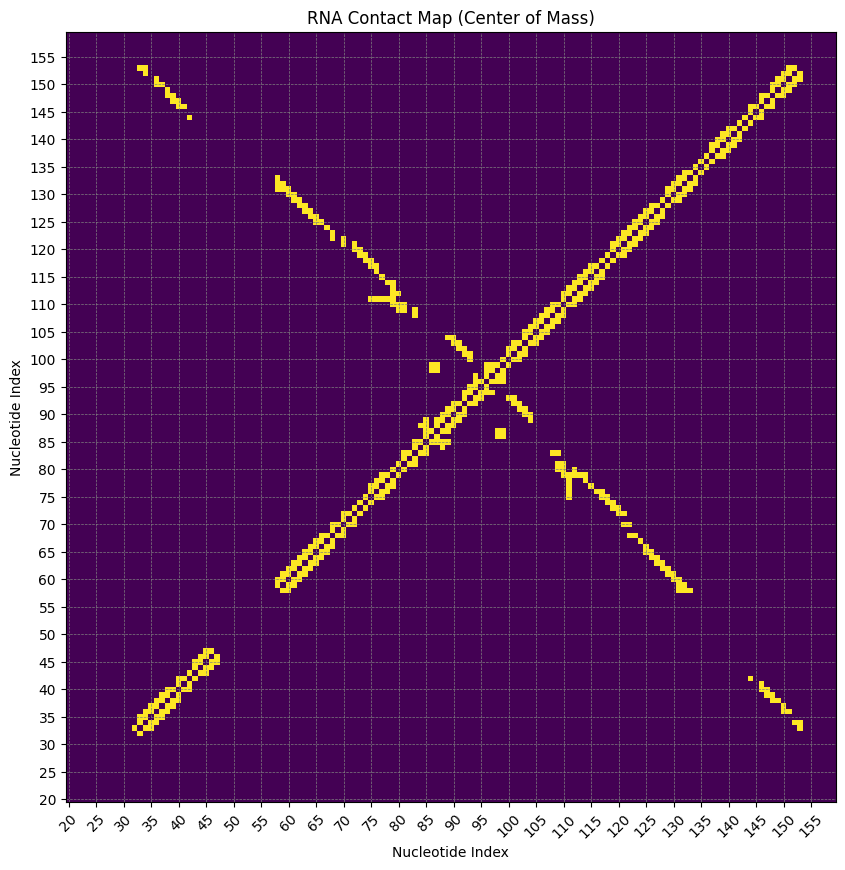

In [60]:
from Bio import PDB

def compute_center_of_mass(residue):
    """Compute the center of mass for a nucleotide (residue)."""
    atom_coords = np.array([atom.coord for atom in residue])
    center_of_mass = np.mean(atom_coords, axis=0)
    return center_of_mass

def parse_rna_structure_centers(pdb_file):
    """Parse the RNA structure from a PDB file and calculate the center of mass for each nucleotide."""
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('RNA', pdb_file)
    
    centers_of_mass = []
    nucleotide_numbers_present = []  # Track actual nucleotide sequence numbers
    
    # Iterate through all residues to compute the center of mass
    for model in structure:
        for chain in model:
            for residue in chain:
                # Check if the residue is RNA (e.g., A, U, G, C)
                if residue.id[0] == ' ' and residue.resname in ['A', 'U', 'G', 'C']:
                    residue_num = residue.id[1]  # Get the nucleotide number (e.g., 21, 22, ...)
                    center_of_mass = compute_center_of_mass(residue)
                    centers_of_mass.append(center_of_mass)
                    nucleotide_numbers_present.append(residue_num)  # Record the nucleotide number
    
    return np.array(centers_of_mass), nucleotide_numbers_present

def compute_contact_map(centers_of_mass, nucleotide_numbers_present, all_nucleotide_numbers, cutoff=10.0):
    """Compute the contact map and account for missing nucleotides."""
    num_nucleotides = len(all_nucleotide_numbers)
    contact_map = np.zeros((num_nucleotides, num_nucleotides), dtype=int)
    
    # Map present nucleotides to their index in the contact map
    nucleotide_index_map = {num: idx for idx, num in enumerate(nucleotide_numbers_present)}
    
    # Iterate over present nucleotides and compute distances
    for i, num_i in enumerate(nucleotide_numbers_present):
        for j, num_j in enumerate(nucleotide_numbers_present):
            if i != j:
                distance = np.linalg.norm(centers_of_mass[i] - centers_of_mass[j])
                if distance <= cutoff:
                    idx_i = all_nucleotide_numbers.index(num_i)
                    idx_j = all_nucleotide_numbers.index(num_j)
                    contact_map[idx_i, idx_j] = 1
                    contact_map[idx_j, idx_i] = 1  # Ensure symmetry
    
    return contact_map

def plot_contact_map(contact_map, all_nucleotide_numbers, step=5):
    """Plot the contact map as a heatmap, including missing nucleotides."""
    plt.figure(figsize=(17, 10))
    plt.imshow(contact_map, cmap='viridis', interpolation='nearest')
    
    # Define the tick positions based on the step
    ticks = np.arange(0, len(all_nucleotide_numbers), step)
    labels = [all_nucleotide_numbers[i] for i in ticks]  # Get the actual nucleotide numbers for the labels
        
    plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
    
    # Set x and y ticks based on actual nucleotide numbers
    plt.xticks(ticks=ticks, labels=labels, fontsize=10, rotation=45)
    plt.yticks(ticks=ticks, labels=labels, fontsize=10)
    
    #plt.colorbar(label='Contact')
    plt.title('RNA Contact Map (Center of Mass)')
    plt.xlabel('Nucleotide Index')
    plt.ylabel('Nucleotide Index')

    # Invert the Y-axis
    plt.gca().invert_yaxis()
    
    plt.show()


# Example usage
pdb_file = 'pdb5vt0.pdb'  # Replace with your PDB file name
centers_of_mass, nucleotide_numbers_present = parse_rna_structure_centers(pdb_file)

# Create a list of all nucleotide numbers from 21 to 164 (including the missing ones)
all_nucleotide_numbers = list(range(20, 160))

# Compute the contact map, accounting for missing nucleotides (48-57)
contact_map1 = compute_contact_map(centers_of_mass, nucleotide_numbers_present, all_nucleotide_numbers)

# Plot the contact map, including the missing nucleotides
plot_contact_map(contact_map1, all_nucleotide_numbers, step=5)


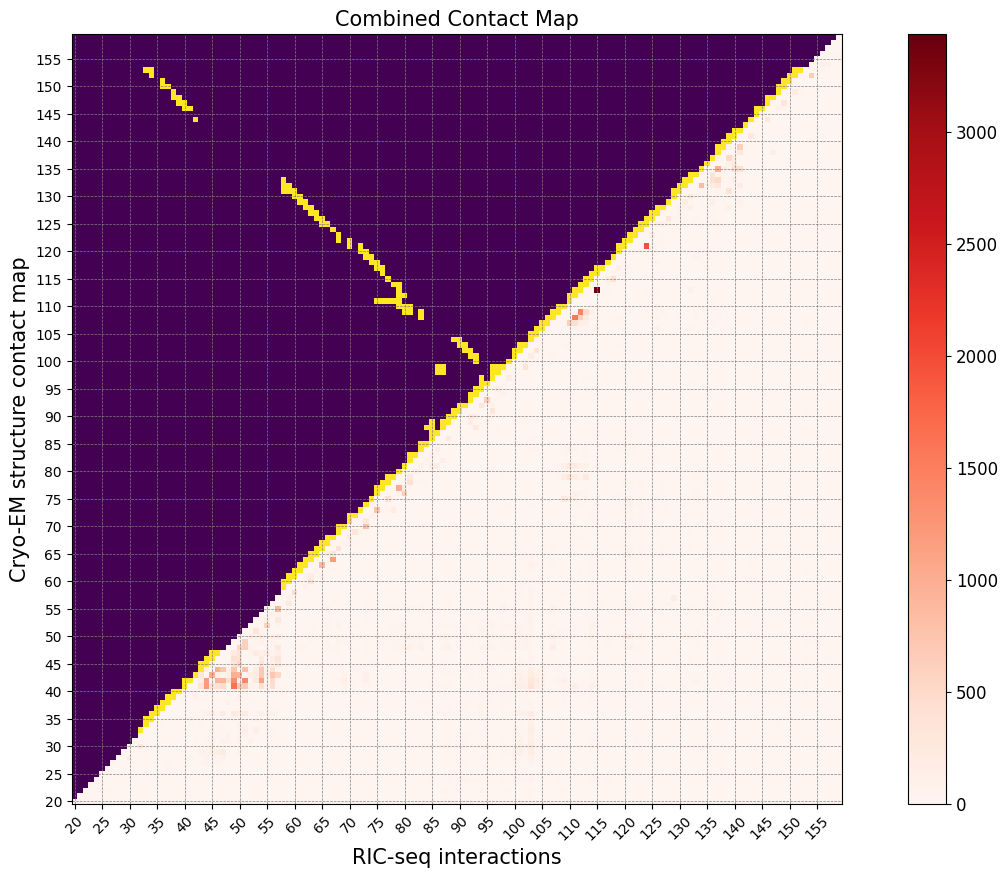

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def combine_contact_maps(contact_map1, contact_map2):
    """Combine two contact maps into one, with map1 in the upper triangle and map2 in the lower triangle."""
    combined_map = np.zeros_like(contact_map1)  # Assuming both contact maps have the same size
    
    # Upper triangle (including the diagonal) will be from contact_map1
    upper_indices = np.triu_indices_from(combined_map)
    combined_map[upper_indices] = contact_map1[upper_indices]
    
    # Lower triangle will be from contact_map2
    lower_indices = np.tril_indices_from(combined_map, k=-1)  # Exclude the diagonal
    combined_map[lower_indices] = contact_map2[lower_indices]
    
    return combined_map

# Example sizes for contact maps, replace with your actual data
matrix_size = 141

# Load or generate your contact maps (replace these with your actual contact map loading code)
#contact_map1 = np.random.randint(0, 2, (matrix_size, matrix_size))  # Placeholder: Load your real contact map 1
#contact_map2 = np.random.randint(0, 2, (matrix_size, matrix_size))  # Placeholder: Load your real contact map 2

# Combine the two maps into one
combined_contact_map = combine_contact_maps(contact_map, contact_map1)

# Plot the combined contact map as a heatmap
plt.figure(figsize=(17, 10))
upper_triangle_mask = np.triu(np.ones_like(combined_contact_map, dtype=bool))
lower_triangle_mask = np.tril(np.ones_like(combined_contact_map, dtype=bool), k=-1)

plt.imshow(np.ma.masked_where(~lower_triangle_mask, combined_contact_map), 
           cmap='viridis', interpolation='nearest', origin='lower')
plt.imshow(np.ma.masked_where(~upper_triangle_mask, combined_contact_map), 
           cmap='Reds', interpolation='nearest', origin='lower')


# Add color bar and labels
cbar=plt.colorbar(label='')
cbar.ax.tick_params(labelsize=12)
plt.title('Combined Contact Map', fontsize=15)
plt.xlabel('RIC-seq interactions', fontsize=15)
plt.ylabel('Cryo-EM structure contact map', fontsize=15)

# Adjust x and y ticks (example ticks)
plt.xticks(ticks=ticks, labels=tick_labels, fontsize=10, rotation=45)
plt.yticks(ticks=ticks, labels=tick_labels, fontsize=10)
# Show the plot
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
plt.show()


Combined Contact Map:
[[5 7 4 ... 8 0 8]
 [3 6 2 ... 9 3 0]
 [4 8 1 ... 1 2 5]
 ...
 [2 2 7 ... 5 9 6]
 [4 4 2 ... 3 0 1]
 [7 4 2 ... 6 8 7]]


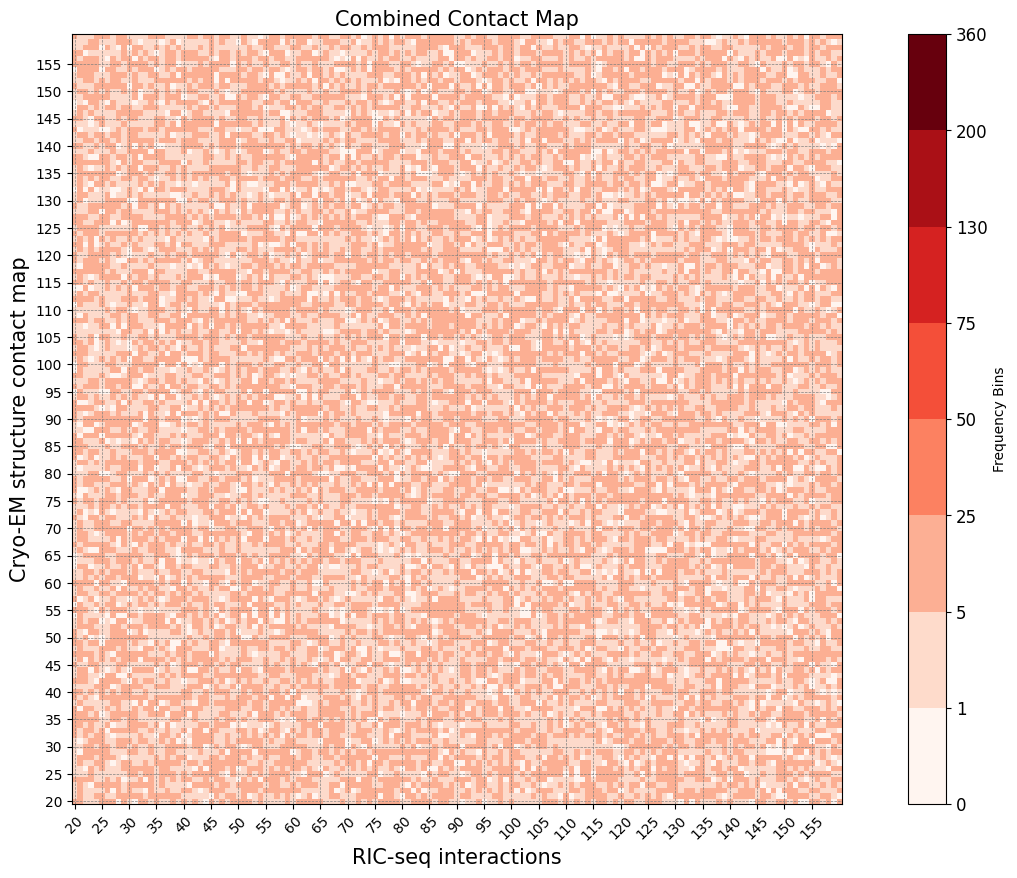

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

def combine_contact_maps(contact_map1, contact_map2):
    """Combine two contact maps into one, with map1 in the upper triangle and map2 in the lower triangle."""
    combined_map = np.zeros_like(contact_map1)  # Assuming both contact maps have the same size
    
    # Upper triangle (including the diagonal) will be from contact_map1
    upper_indices = np.triu_indices_from(combined_map)
    combined_map[upper_indices] = contact_map1[upper_indices]
    
    # Lower triangle will be from contact_map2
    lower_indices = np.tril_indices_from(combined_map, k=-1)  # Exclude the diagonal
    combined_map[lower_indices] = contact_map2[lower_indices]
    
    return combined_map

# Example sizes for contact maps, replace with your actual data
matrix_size = 141

# Initialize some example contact maps with random data for testing
contact_map1 = np.random.randint(0, 10, (matrix_size, matrix_size))  # Replace with your real contact map 1
contact_map2 = np.random.randint(0, 10, (matrix_size, matrix_size))  # Replace with your real contact map 2

# Combine the two maps into one (using actual data for contact_map1 and contact_map2)
combined_contact_map = combine_contact_maps(contact_map2, contact_map1)

# Debugging: Print the combined map to see if it has any non-zero values
print("Combined Contact Map:")
print(combined_contact_map)

# Define the bins for frequency ranges
bins = [0, 1, 5, 25, 50, 75, 130, 200, 360]

# Create a colormap with a distinct set of colors
cmap = plt.get_cmap('Reds', len(bins) - 1)

# Define BoundaryNorm for color normalization
norm = BoundaryNorm(bins, cmap.N)

# Plot the combined contact map with the defined color bins
plt.figure(figsize=(17, 10))

# Apply a mask for upper and lower triangles
upper_triangle_mask = np.triu(np.ones_like(combined_contact_map, dtype=bool))
lower_triangle_mask = np.tril(np.ones_like(combined_contact_map, dtype=bool), k=-1)

# Plot upper triangle with a masked lower triangle (using cmap 'coolwarm')
plt.imshow(np.ma.masked_where(~lower_triangle_mask, combined_contact_map), 
           cmap=cmap, interpolation='nearest', origin='lower', norm=norm)

# Plot lower triangle with a masked upper triangle (using cmap 'viridis')
plt.imshow(np.ma.masked_where(~upper_triangle_mask, combined_contact_map), 
           cmap=cmap, interpolation='nearest', origin='lower', norm=norm)

# Add color bar with labels matching the bins
cbar = plt.colorbar(label='Frequency Bins')
cbar.set_ticks(bins)  # Ensure color bar ticks match the defined bins
cbar.ax.tick_params(labelsize=12)

# Add plot labels and title
plt.title('Combined Contact Map', fontsize=15)
plt.xlabel('RIC-seq interactions', fontsize=15)
plt.ylabel('Cryo-EM structure contact map', fontsize=15)

# Adjust x and y ticks (example ticks)
ticks = np.arange(0, matrix_size, 5)
tick_labels = np.arange(20, 160, 5)

# Make sure the number of ticks matches the number of tick labels
if len(ticks) != len(tick_labels):
    ticks = ticks[:len(tick_labels)]  # Trim the ticks array to match the number of labels

plt.xticks(ticks=ticks, labels=tick_labels, fontsize=10, rotation=45)
plt.yticks(ticks=ticks, labels=tick_labels, fontsize=10)

# Show the plot
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
plt.show()


3055612

'import matplotlib.pyplot as plt\nfrom collections import Counter\n\n# Function to read the file and extract start and end positions\ndef read_positions_from_file(file_path):\n    positions = []\n    with open(file_path, \'r\') as file:\n        for line in file:\n            if line.startswith("track"):\n                continue\n            parts = line.strip().split()\n            start = int(parts[1])-3055983           #   -3055983   -2755593\n            end = int(parts[2])-3055983              #   -3055983   -2755593\n            positions.extend([start, end])\n    return positions\n\n# Function to count frequencies of positions\ndef count_frequencies(positions):\n    counter = Counter(positions)\n    \n    return counter\n\n# Function to plot the bar graph\ndef plot_frequencies(counter):\n    sorted_counter = dict(sorted(counter.items()))\n    plt.figure(figsize=(12, 6))\n    plt.bar(sorted_counter.keys(), sorted_counter.values(), width=1)\n    plt.xlabel(\'Base position\')\n   

'import matplotlib.pyplot as plt\nimport matplotlib.patches as patches\nimport numpy as np\n\n# Define the file name\nfilename = \'filtered_arcs_ssrS.bed\'\n\n# Read the coordinates from the file, skipping the first line\ncoordinates = []\nwith open(filename, \'r\') as file:\n    next(file)  # Skip the header\n    for line in file:\n        parts = line.strip().split()\n        start = int(parts[1]) -3055983  \n        end = int(parts[2]) -3055983  \n        coordinates.append((start, end))\n\n# Extract start and end coordinates\nstarts, ends = zip(*coordinates)\n\n# Set up the figure and axis\nfig, ax = plt.subplots(figsize=(15, 8))\n\n# Function to determine the color of the arc based on its length\ndef get_arc_color(length):\n    if length < 5:\n        return \'red\'\n    else:\n        return \'blue\' \n    \n    \n\n\ndef get_arc_height(length):\n    return length / 2\n    \nfor i, (start, end) in enumerate(coordinates):\n    mid = (start + end) / 2\n    arc_length = end - start\

In [ ]:
#####
#####
#####
##########
#####
#####
##########
#####
#####
##########
#####
#####
#####

In [67]:
#isolate region of ssrA 2755593	2755955
coord1=2755593
coord2=2755955
i=0
with open('output.RNA-RNA_operon_noChim.bed', 'r') as rr, open('ssrA_gene.bed','w') as out: #change name output file
    for line in rr:
        sub=line.split()
        if sub[0]=='track':
            continue
        #if int(sub[2]) - int(sub[1]) > 10: 
        if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[2]) <=coord2:   
            out.write(f'{sub[0]}\t{sub[1]}\t{sub[2]}\n')

In [ ]:
coord1=2755593
coord2=2755955
#isolate region of ssrA from chim.out.junction files

with open('read_1_toGenome_Chimeric.out.junction','r') as cj, open('chim_ssrA.bed','w') as co:
    for line in cj:
        if line.startswith('track'):
            continue
        sub=line.split()
        if coord1<=int(sub[1])<=coord2 and coord1<=int(sub[4])<=coord2:
            co.write(f'{sub[1]}\t{sub[4]}\n')
            
with open('read_2_toGenome_Chimeric.out.junction','r') as cj, open('chim_ssrA.bed','a') as co:
    for line in cj:
        if line.startswith('track'):
            continue
        sub=line.split()
        if coord1<=int(sub[1])<=coord2 and coord1<=int(sub[4])<=coord2:
            co.write(f'{sub[1]}\t{sub[4]}\n')

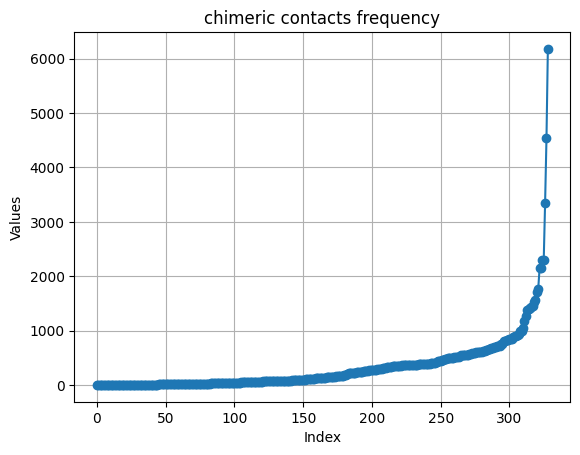

In [70]:
#filtering
import pandas as pd
from collections import Counter

with open('ssrA_gene.bed',"r") as ppp:
    dicpos={}
    for line in ppp:
        sub=line.split()
        contact=(sub[0], sub[1])
        
        if contact in dicpos.keys():
            dicpos[contact]+=1
        else:
            dicpos[contact]=1

import matplotlib.pyplot as plt

# Extract the values from the dictionary
values = sorted(dicpos.values())
datatoplot=[]
for i in values:
    if not 0<i<0:
        datatoplot.append(i)

# Plotting the values
plt.plot(datatoplot, marker='o')
plt.title('chimeric contacts frequency')
plt.ylabel('Values')
plt.xlabel('Index')
plt.grid(True)
plt.show()

with open('filter_contacts_chim_ssrA.bed', 'w') as oop:
    for i in dicpos.keys():
        if dicpos[i] >= 300: ###################################
            oop.write(f'{i[0]}\t{i[1]}\n')


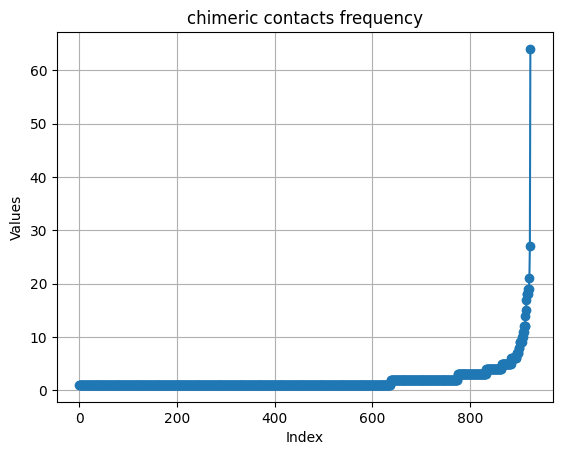

In [71]:
#filtering
import pandas as pd
from collections import Counter

with open('chim_ssrA.bed',"r") as ppp:
    dicpos={}
    for line in ppp:
        sub=line.split()
        contact=(sub[0], sub[1])
        
        if contact in dicpos.keys():
            dicpos[contact]+=1
        else:
            dicpos[contact]=1

import matplotlib.pyplot as plt

# Extract the values from the dictionary
values = sorted(dicpos.values())
datatoplot=[]
for i in values:
    if not 0<i<0:
        datatoplot.append(i)

# Plotting the values
plt.plot(datatoplot, marker='o')
plt.title('chimeric contacts frequency')
plt.ylabel('Values')
plt.xlabel('Index')
plt.grid(True)
plt.show()

with open('filter_contacts_chim_ssrA.bed', 'w') as oop:
    for i in dicpos.keys():
        if dicpos[i] >= 5: ###################################
            oop.write(f'{i[0]}\t{i[1]}\n')


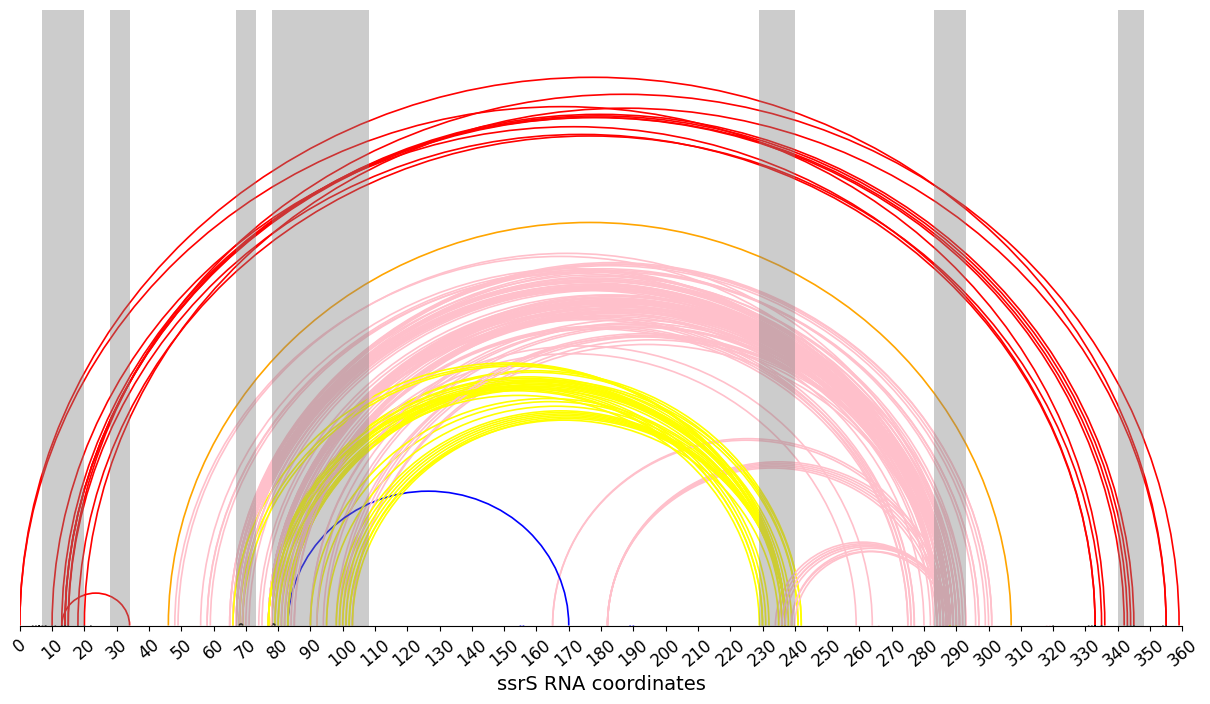

In [72]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define the file name
filename = 'filter_contacts_ssrA.bed'

# Read the coordinates from the file, skipping the first line
coordinates = []
with open(filename, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        parts = line.strip().split()
        start = int(parts[0]) -2755593 
        end = int(parts[1]) -2755593 
        coordinates.append((start, end))
        
# Read the coordinates from the file, skipping the first line

with open('filter_contacts_chim_ssrA.bed', 'r') as file:
    next(file)  # Skip the header
    for line in file:
        parts = line.strip().split()
        start = int(parts[0]) -2755593 
        end = int(parts[1]) -2755593 
        coordinates.append((start, end))

# Extract start and end coordinates
starts, ends = zip(*coordinates)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

def get_arc_height(length):
    return length / 2

def get_arc_color(endb):
    
    if 108 <= endb <= 137:
        return 'purple'
    elif 138 <= endb <= 196:
        return 'blue'
    elif 197 <= endb <= 246:
        return 'yellow'
    elif 247 <= endb <= 301:
        return 'pink'
    elif 302 <= endb <= 320:
        return 'orange'
    elif 330 <= endb:
        return 'red'
    elif 29 <= endb<=34:
        return 'red'
    
for i, (start, end) in enumerate(coordinates):
    mid = (start + end) / 2
    arc_length = end - start
    height = get_arc_height(arc_length)  # Set height based on arc length
    color = get_arc_color(end)  # Determine color based on arc length
    
    # Apply a vertical offset to separate arcs
    offset = i * 15  # Adjust this value to control the separation
    arc = patches.Arc([mid, 0], arc_length, height*3.6, angle=0, theta1=0, theta2=180, color=color, linewidth=1.2, alpha=1)
    ax.add_patch(arc)

# Customize the plot
ax.set_ylim(0, max(ends) - min(starts))  # Ensure arcs are properly scaled vertically
#ax.set_xlim(0,365)  # Adjust x-limits to fit all arcs
ax.set_xlabel("ssrS RNA coordinates", fontsize=14)
#ax.set_xticks(list(range(0,365,10)))
ax.set_yticks([])  # Remove y-axis labels as they are not meaningful here
ax.spines['left'].set_color('none')       # Hide the left y-axis line
ax.spines['right'].set_color('none')      # Hide the right y-axis line
ax.spines['top'].set_color('none')        # Hide the top x-axis line
ax.spines['bottom'].set_position('zero')  # Position the x-axis at y=0

plt.xticks(list(range(0, 365, 10)), fontsize=12, rotation=40)

rect = patches.Rectangle((7, 0), 13, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)
rect2 = patches.Rectangle((28, 0), 6, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)
rect3 = patches.Rectangle((67, 0), 6, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)
rect4 = patches.Rectangle((78, 0), 30, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)
rect5 = patches.Rectangle((229, 0), 11, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)
rect6 = patches.Rectangle((283, 0), 10, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)
rect7 = patches.Rectangle((340, 0), 8, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='gray', alpha=0.4)


ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)
ax.add_patch(rect7)



plt.show()

        

In [ ]:
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####
#####

In [10]:
##script new homodimers


In [66]:
import re
with open("read_1_toGenome_Chimeric.out.junction", 'r') as cj1, open("read_2_toGenome_Chimeric.out.junction", 'r') as cj2, open("homo_samestrand.txt", 'w') as oh:
    for line in cj1:
        sub=line.split()
        CIGAR1=sub[11]
        CIGAR2=sub[13]
        Mlen1 = [int(i[:-1]) for i in re.findall('[0-9]+M', CIGAR1)]
        Mlen2 = [int(i[:-1]) for i in re.findall('[0-9]+M', CIGAR2)]
        Nlen1 = [int(i[:-1]) for i in re.findall('[0-9]+N', CIGAR1)]
        Nlen2 = [int(i[:-1]) for i in re.findall('[0-9]+N', CIGAR2)]
        if sub[2] == sub[5] == '+':
            s1= int(sub[10])
            e1= int(sub[1])
            s2= int(sub[4])
            e2= int(sub[4])+sum(Mlen2)+sum(Nlen2)
            
        elif sub[2] == sub[5] == '-':
            s1= int(sub[1])
            e1= int(sub[1])+sum(Mlen1)+sum(Nlen1)
            s2= int(sub[12])
            e2= int(sub[4])
        
        """elif sub[2] =='+' and sub[5] == '-':
            s1= int(sub[10])
            e1= int(sub[1])
            s2= int(sub[12])
            e2= int(sub[4])
        
        elif sub[2] == '-' and sub[5] == '+':
            s1= int(sub[1])
            e1= int(sub[1])+sum(Mlen1)+sum(Nlen1)
            s2= int(sub[4])
            e2= int(sub[4])+sum(Mlen2)+sum(Nlen2)"""
            
        L= 1+min(e1,e2)-max(s1,s2)
        
        if L>=5:
            #oh.write(f"a\t{sub[1]}\t{sub[4]}\n")
            if sub[2] == sub[5] == '+':
                oh.write(f"{s1}\t{e1}\t{s2}\t{e2}\n")
            else:
                oh.write(f"{s2}\t{e2}\t{s1}\t{e1}\n")
            
            

    for line in cj2:
        sub=line.split()
        CIGAR1=sub[11]
        CIGAR2=sub[13]
        Mlen1 = [int(i[:-1]) for i in re.findall('[0-9]+M', CIGAR1)]
        Mlen2 = [int(i[:-1]) for i in re.findall('[0-9]+M', CIGAR2)]
        Nlen1 = [int(i[:-1]) for i in re.findall('[0-9]+N', CIGAR1)]
        Nlen2 = [int(i[:-1]) for i in re.findall('[0-9]+N', CIGAR2)]
        if sub[2] == sub[5] == '+':
            s1= int(sub[10])
            e1= int(sub[1])
            s2= int(sub[4])
            e2= int(sub[4])+sum(Mlen2)+sum(Nlen2)
            
        elif sub[2] == sub[5] == '-':
            s2= int(sub[1])
            e2= int(sub[1])+sum(Mlen1)+sum(Nlen1)
            s1= int(sub[12])
            e1= int(sub[4])
            
        """elif sub[2] =='+' and sub[5] == '-':
            s1= int(sub[10])
            e1= int(sub[1])
            s2= int(sub[12])
            e2= int(sub[4])
        
        elif sub[2] == '-' and sub[5] == '+':
            s1= int(sub[1])
            e1= int(sub[1])+sum(Mlen1)+sum(Nlen1)
            s2= int(sub[4])
            e2= int(sub[4])+sum(Mlen2)+sum(Nlen2)"""
            
        L= 1+min(e1,e2)-max(s1,s2)
        
        if L>=5:
            #oh.write(f"a\t{sub[1]}\t{sub[4]}\n")
            if sub[2] == sub[5] == '+':
                oh.write(f"{s1}\t{e1}\t{s2}\t{e2}\n")
            else:
                oh.write(f"{s2}\t{e2}\t{s1}\t{e1}\n")



            

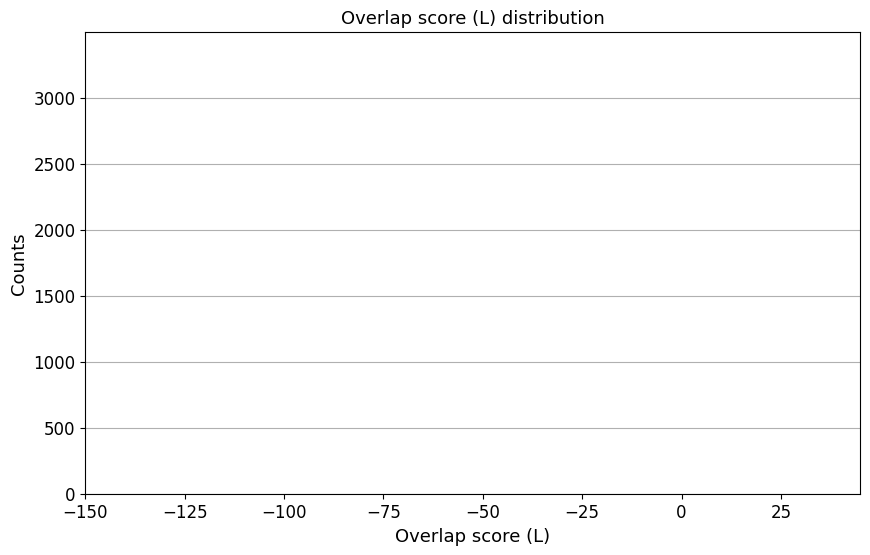

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.txt' with the path to your .txt file
file_path = 'homo_samestrand.txt'
try:
    # Read the data into a DataFrame
    data = pd.read_csv(file_path, delim_whitespace=True, header=None)
    
    # Check if the file was read correctly and has at least 6 columns
    if data.shape[1] >= 3:
        column_5_data = data[2]
        
        
        # Count the frequency of each number in the column
        frequency = column_5_data.value_counts().sort_index()
        # Plotting the bar graph
        plt.figure(figsize=(10, 6))
        plt.bar(frequency.index, frequency.values, width=1)
        plt.xlabel('Overlap score (L)', fontsize=13)
        plt.ylabel('Counts', fontsize=13)
        plt.title('Overlap score (L) distribution', fontsize=13)
        plt.grid(axis='y')
        plt.xlim(-150,45)
        plt.ylim(0,3500)
        plt.xticks(list(range(-150,45,25)), fontsize=12)
        plt.yticks(list(range(0,3500, 500)), fontsize=12)
        plt.show()
    else:
        print("The file does not have at least 6 columns.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.ParserError:
    print("Error parsing the file. Please check the file format and delimiter.")
except Exception as e:
    print(f"An error occurred: {e}")

-1844

In [ ]:
###############################################################################

In [ ]:
#ssrS 19%
#coord1=3055983
#coord2=3056165

#rnbp 26%
#coord1=3270216	
#coord2=3270592

#rybA 18%
#coord1=852725	
#coord2=853064

#ssrA 19%
##coord1=2755593
#coord2=2755955

#RyeB 70%       
#coord1=1923104		
#coord2=1923207	

#USpa 79%
coord1=3640111	
coord2=3640545	


#heml
#coord1=173602	
#coord2=174882

#bswR
#
 
j=0
with open('homo_samestrand.bed', 'r') as rr, open('ssrS_homo.bed','w') as out: #change name output file
    for line in rr:
        sub=line.split()
        if sub[0]=='track':
            continue
        
        if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[2]) <=coord2:   
            out.write(f'{sub[0]}\t{sub[1]}\t{sub[2]}\n')
            j+=1

#count reads
count_total_gap=0
with open('read_1_toGenome_Chimeric.out.junction', 'r') as rr, open('read_2_toGenome_Chimeric.out.junction', 'r') as rr2: #change name output file
    for line in rr:
        sub=line.split()
        if line.startswith('@'):
            continue
        
        if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[10]) <=coord2:   
            if coord1 <= int(sub[4]) <=coord2 and coord1 <= int(sub[12]) <=coord2:
                count_total_gap+=1  
            
    for line in rr2:
        sub=line.split()
        if line.startswith('@'):
            continue
        
        if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[10]) <=coord2:   
            if coord1 <= int(sub[4]) <=coord2 and coord1 <= int(sub[12]) <=coord2:
                count_total_gap+=1
print(count_total_gap)
print(j)
print(j/count_total_gap)

99
79
0.797979797979798


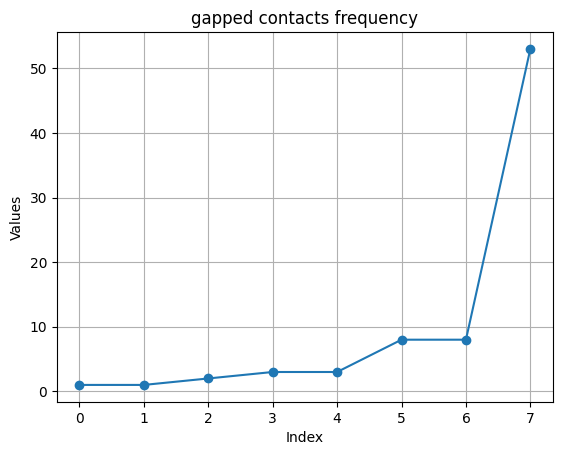

In [34]:
import pandas as pd
from collections import Counter

with open('ssrS_homo.bed',"r") as ppp:
    dicpos={}
    for line in ppp:
        sub=line.split()
        contact=(sub[1], sub[2])
        
        if contact in dicpos.keys():
            dicpos[contact]+=1
        else:
            dicpos[contact]=1

import matplotlib.pyplot as plt

# Extract the values from the dictionary
values = sorted(dicpos.values())
datatoplot=[]
for i in values:
    if not 0<i<0:
        datatoplot.append(i)

# Plotting the values
plt.plot(datatoplot, marker='o')
plt.title('gapped contacts frequency')
plt.ylabel('Values')
plt.xlabel('Index')
plt.grid(True)
plt.show()

with open('filtered_ssrS_homo.bed', 'w') as oop:
    for i in dicpos.keys():
        if dicpos[i] >= 0: ###################################
            oop.write(f'{i[0]}\t{i[1]}\n')


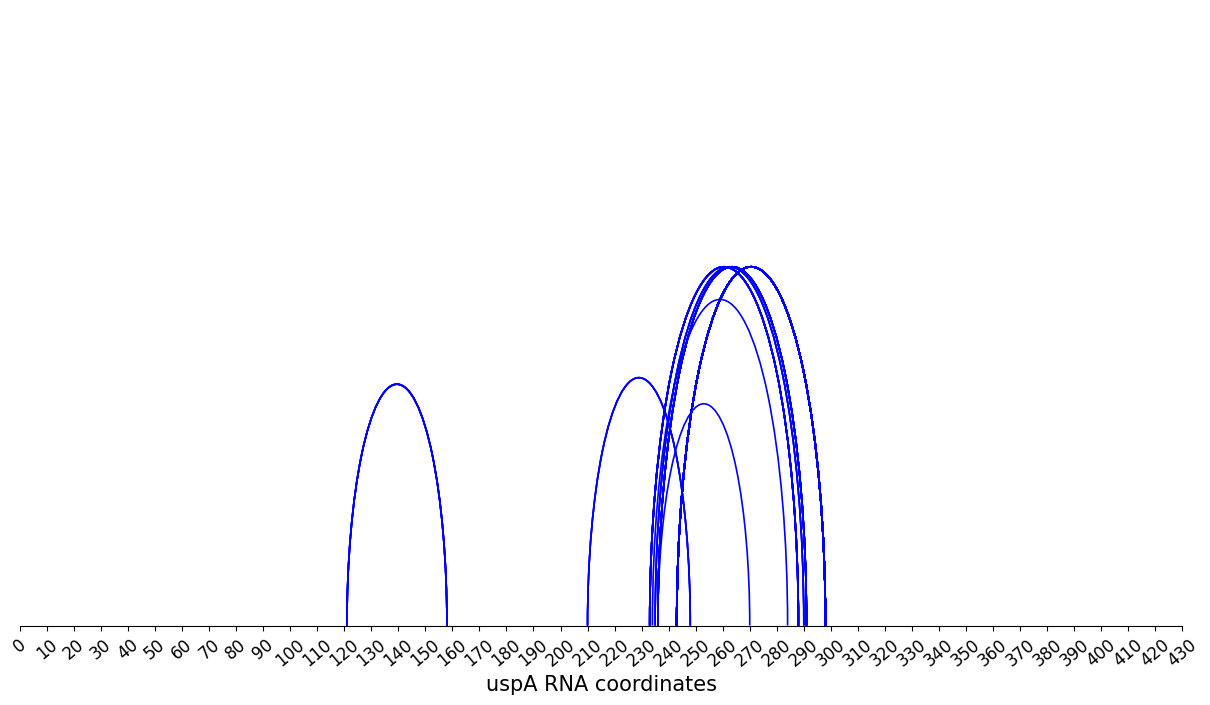

In [48]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
coord1=3640111	
coord2=3640545	
# Define the file name
filename = 'overlap_graph.bed'

# Read the coordinates from the file, skipping the first line
coordinates = []
with open(filename, 'r') as file:
    
    for line in file:
        parts = line.strip().split()
        start = int(parts[0]) -coord1  
        end = int(parts[1]) -coord1 
        coordinates.append((start, end))


# Extract start and end coordinates
starts, ends = zip(*coordinates)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))


    
for i, (start, end) in enumerate(coordinates):
    mid = (start + end) / 2
    arc_length = end - start
    height = (start - end)/2  # Set height based on arc length
    color = 'blue'  # Determine color based on arc length
    
    # Apply a vertical offset to separate arcs
    offset = i * 15  # Adjust this value to control the separation
    arc = patches.Arc([mid, 0], arc_length, height*3.6, angle=0, theta1=0, theta2=180, color=color, linewidth=1.2, alpha=1)
    ax.add_patch(arc)

# Customize the plot

ax.set_ylim(0, max(ends) - min(starts))  # Ensure arcs are properly scaled vertically
ax.set_xlabel("uspA RNA coordinates", fontsize=15)
ax.set_yticks([])
ax.spines['left'].set_color('none')       # Hide the left y-axis line
ax.spines['right'].set_color('none')      # Hide the right y-axis line
ax.spines['top'].set_color('none')        # Hide the top x-axis line
ax.spines['bottom'].set_position('zero')  # Position the x-axis at y=0
plt.xticks(list(range(0,coord2-coord1 , 10)), fontsize=12, rotation=40)

"""rect = patches.Rectangle((25, 0), 46, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='LIGHTSKYBLUE', alpha=0.3)
rect2 = patches.Rectangle((120, 0), 12, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='green', alpha=0.3)
rect3 = patches.Rectangle((132, 0), 21, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='yellow', alpha=0.3)
rect4 = patches.Rectangle((153, 0), 8, max(ends) - min(starts), linewidth=0, edgecolor='none', facecolor='green', alpha=0.3)
ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)"""


plt.show()

        

In [40]:
from scipy.stats import chi2_contingency

# Observed counts for both populations
observed_1 = [169, 1300 - 169]  # 169 overlapping, rest non-overlapping for the first population
observed_2 = [79, 20]  # 79% overlapping for the second population

# Expected counts (assuming a 50-50 distribution)
expected_1 = [1300 * 0.15, 1300 * 0.85]
expected_2 = [99 * 0.15, 99 * 0.85]

# Perform Chi-Square test for both populations
chi2_1, p_value_1, _, _ = chi2_contingency([observed_1, expected_1], correction=False)
chi2_2, p_value_2, _, _ = chi2_contingency([observed_2, expected_2], correction=False)

# Results
print("Population 1: Chi-Square =", chi2_1, ", p-value =", p_value_1)
print("Population 2: Chi-Square =", chi2_2, ", p-value =", p_value_2)


Population 1: Chi-Square = 2.1594684385382057 , p-value = 0.14169370011142
Population 2: Chi-Square = 83.36139246317768 , p-value = 6.834380225141887e-20


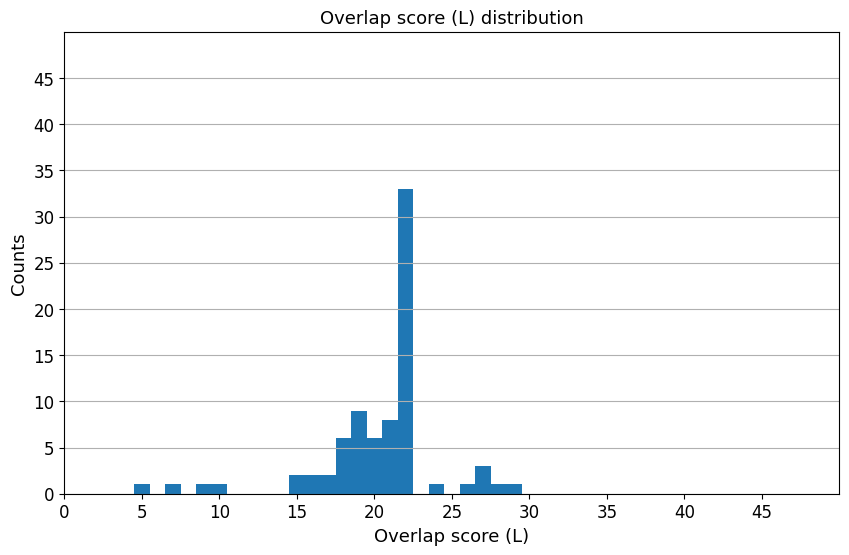

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Coordinates to filter by
coord1 = 3640111
coord2 = 3640545

# File path
file_path = 'homo_samestrand.txt'

try:
    # Read the data into a DataFrame
    data = pd.read_csv(file_path, delim_whitespace=True, header=None)
    
    # Check if the file was read correctly and has at least 3 columns
    if data.shape[1] >= 3:
        
        # Filter the DataFrame based on the condition that the values in columns [0] and [1] are between coord1 and coord2
        filtered_data = data[(data[0] >= coord1) & (data[0] <= coord2) & (data[1] >= coord1) & (data[1] <= coord2)]
        
        if not filtered_data.empty:
            # Extract column 2 (Overlap scores) from the filtered data
            column_5_data = filtered_data[2]
            
            # Count the frequency of each number in the column
            frequency = column_5_data.value_counts().sort_index()
            
            # Plotting the bar graph
            plt.figure(figsize=(10, 6))
            plt.bar(frequency.index, frequency.values, width=1)
            plt.xlabel('Overlap score (L)', fontsize=13)
            plt.ylabel('Counts', fontsize=13)
            plt.title('Overlap score (L) distribution', fontsize=13)
            plt.grid(axis='y')
            plt.xlim(0, 50)
            plt.ylim(0, 50)
            plt.xticks(list(range(0, 50, 5)), fontsize=12)
            plt.yticks(list(range(0, 50, 5)), fontsize=12)
            plt.show()
        else:
            print("No data within the specified coordinates.")
    
    else:
        print("The file does not have at least 3 columns.")
        
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.ParserError:
    print("Error parsing the file. Please check the file format and delimiter.")
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
#######
#######
#######
#######
#######
#######
#######
#######

In [4]:
#check all genes for homodimers, but frist get all gene regions
with open('gene_region.bed', 'r') as gr, open('gene_smaller.bed','w') as ou:
    for line in gr:
        sub=line.split()
        if not sub[4].startswith('NP'):
            ou.write(f'{sub[4]}\t{sub[1]}\t{sub[2]}\n')

In [5]:
#use homo_samestrand.bed


with open('gene_smaller.bed', 'r') as gs, open('genes_homodimers.bed','w') as finout:
    for line in gs:
        subgs=line.split()
        gene=subgs[0]
        coord1 = int(subgs[1])
        coord2 = int(subgs[2])
        j=0
        with open('homo_samestrand.txt', 'r') as rr0: 
            for line in rr0:
                suba=line.split()
                if suba[0]=='track':
                    continue
                
                if coord1 <= int(suba[1]) <=coord2 and coord1 <= int(suba[2]) <=coord2:   
                    j+=1
        if j <=5:
            continue
        #count reads
        count_total_gap=0
        with open('read_1_toGenome_Chimeric.out.junction', 'r') as rr, open('read_2_toGenome_Chimeric.out.junction', 'r') as rr2: #change name output file
            for line in rr:
                sub=line.split()
                if line.startswith('@'):
                    continue
                
                if coord1 <= int(sub[1]) <=coord2 or  coord1 <= int(sub[10]) <=coord2:   
                    if coord1 <= int(sub[4]) <=coord2 or coord1 <= int(sub[12]) <=coord2:
                        count_total_gap+=1  
                    
            for line in rr2:
                sub=line.split()
                if line.startswith('@'):
                    continue
                
                if coord1 <= int(sub[1]) <=coord2 or coord1 <= int(sub[10]) <=coord2:   
                    if coord1 <= int(sub[4]) <=coord2 or coord1 <= int(sub[12]) <=coord2:
                        count_total_gap+=1
        finout.write(f'{gene}\t{count_total_gap}\t{(j/count_total_gap)*100}\n')

        

In [8]:
with open('genes_homodimers.bed','r') as aaa:
    for line in aaa:
        sub=line.split()
        if int(sub[1])>60 and float(sub[2])>40:
            print(line)

uspA	109	79.81651376146789

csrC	73	58.9041095890411

rna-b4457	73	58.9041095890411

exon-b4457-1	73	58.9041095890411



In [50]:
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
with open('genes_homodimers.bed','r') as gh, open('chi2_out.txt','w') as ouu:
    for line in gh:
        sub=line.split()
        gene=sub[0]
        number_overlap=round(float(sub[1]))*round(float(sub[2]))/100
        total_count=int(sub[1])
        
        
        # Observed counts for both populations
        observed = [number_overlap, total_count - number_overlap]  # 169 overlapping, rest non-overlapping for the first population
     

        # Expected counts
        expected = [total_count * 0.15, total_count * 0.85]
        

        # Perform Chi-Square test for populations
        chi2, p_value, _, _ = chi2_contingency([observed, expected], correction=False)

        #binomial test
        # Test proportion (15%)
        p0 = 0.15

        # Conduct proportion z-test
        count = number_overlap
        nobs = total_count
        z_stat, p_value_bin = proportions_ztest(count, nobs, value=p0)
        
        
        # Results
        if p_value <= 0.05:
            ouu.write(f'{round(float(sub[2]),2)}%\t{total_count}\t{gene}: Chi-Square = {chi2} , p-value = {p_value}, bin: {z_stat}\t{p_value_bin}\n')
        



In [60]:
with open('gene_smaller.bed', 'r') as gs:
    for line in gs:
        sub=line.split()
        if sub[0]=='yjbJ':
            print(sub)
        

['yjbJ', '4259237', '4259446']


In [20]:
coordlist=[
    ['6S RNA',3055983,3056165],
    ['heml',173602,174882],
    ['rmf',1015715,1015882],
    ['uspA',3640111,3640545],
    ['rnbp',3270216,3270592],
    ['csrC',4051036,4051280]
]

output_for_graph=[]

#ssrS
#coord1=3055983
#coord2=3056165

"""
189
4896
3%

189
1306
15%
"""

#heml
#coord1=173602	
#coord2=174882

"""
1
49
2%

1
49
2%
"""

# 'rmf', 
#coord1=1015715
#coord2=1015882

"""
187
1198
15%

187
400
47%
"""

# uspA 
#coord1= 3640111	
#coord2= 3640545	

"""
87
109
80%

87
99
88%
"""

#rnbp
#coord1=3270216	
#coord2=3270592

"""
60
558
11%

60
774
7%
"""

#csrC
#coord1=4051036
#coord2=4051280
"""
43
62
70%

43
73
59%
"""

for cord in coordlist:
    name=cord[0]
    coord1=cord[1]
    coord2=cord[2]
    j=0
    with open('homo_samestrand.txt', 'r') as rr, open('overlap_graph.bed','w') as out: #change name output file
        for line in rr:
            sub=line.split()
            if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[2]) <=coord2:   
                out.write(f'{sub[1]}\t{sub[2]}\t{int(sub[2])-int(sub[1])}\n')
                j+=1

    #count reads
    count_total_gap=0
    with open('read_1_toGenome_Chimeric.out.junction', 'r') as rr, open('read_2_toGenome_Chimeric.out.junction', 'r') as rr2: #change name output file
        for line in rr:
            sub=line.split()
            if line.startswith('@'):
                continue
            
            if coord1 <= int(sub[1]) <=coord2 or coord1 <= int(sub[10]) <=coord2:   
                if coord1 <= int(sub[4]) <=coord2 or coord1 <= int(sub[12]) <=coord2:
                    count_total_gap+=1  
                
        for line in rr2:
            sub=line.split()
            if line.startswith('@'):
                continue
            
            if coord1 <= int(sub[1]) <=coord2 or coord1 <= int(sub[10]) <=coord2:   
                if coord1 <= int(sub[4]) <=coord2 or coord1 <= int(sub[12]) <=coord2:
                    count_total_gap+=1
    
    output_for_graph.append([name,j,int(count_total_gap)-int(j)])
    #print(name)
    #print(j)
    #print(count_total_gap)
    #print('-')
    #print(j/count_total_gap)
print(output_for_graph)



[['6S RNA', 189, 4707], ['heml', 1, 48], ['rmf', 187, 1011], ['uspA', 87, 22], ['rnbp', 60, 714], ['csrC', 43, 30]]


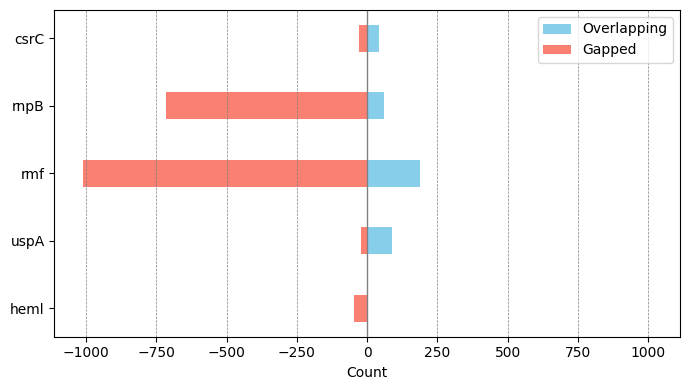

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = [
    ['heml', 1, 48],
    ['uspA', 87, 22],
    ['rmf', 187, 1011],
    
    ['rnpB', 60, 714],
    ['csrC', 43, 30]
]

# Names, homomer counts, and non-homomer counts
names = [item[0] for item in data]
homomers = [item[1] for item in data]
non_homomers = [-item[2] for item in data]  # Negative for left side of the bar
max_limit = max(max(homomers), -min(non_homomers)) * 1.1  # Slight padding

# Position of the bars on the y-axis
y_pos = np.arange(len(names))* 0.5

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))
ax.barh(y_pos, homomers, color='skyblue', label='Overlapping', align='center',height=0.2)
ax.barh(y_pos, non_homomers, color='salmon', label='Gapped', align='center',height=0.2)

# Add a vertical line at x=0 to separate the counts
ax.axvline(0, color='gray', linewidth=1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='x')

# Labels and customization
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.set_xlabel('Count')
#ax.set_title('Homomer and Non-Homomeric Counts')
ax.set_xlim(-max_limit, max_limit)

# Legend
ax.legend()

# Display plot
plt.tight_layout()
plt.show()


In [3]:
# create file for below graph
#csrC 244
#coord1=4051036
#coord2=4051280
#uspA 343
coord1= 3640111	
coord2= 3640545
with open('homo_samestrand.txt', 'r') as rr, open('overlap_fragments.txt','w') as out: #change name output file
    for line in rr:
        sub=line.split()
        if coord1 <= int(sub[1]) <=coord2 and coord1 <= int(sub[2]) <=coord2:   
            out.write(f'{int(sub[0])-coord1}\t{int(sub[1])-coord1}\t{int(sub[2])-coord1}\t{int(sub[3])-coord1}\n')

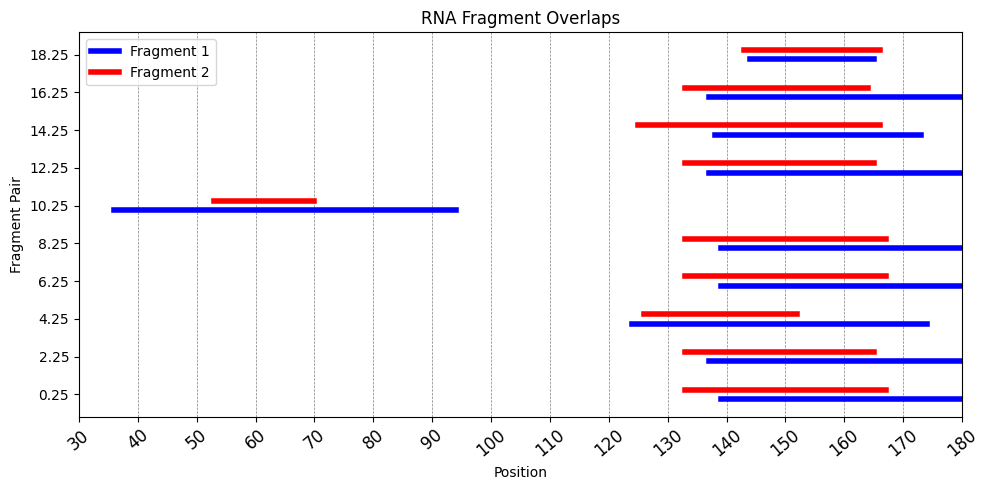

In [126]:
import matplotlib.pyplot as plt
import random

# Load data from the file
# Replace 'your_file.txt' with the path to your actual file
data = []
with open('overlap_fragments.txt', 'r') as file:
    for line in file:
        # Assumes each line has four integers separated by spaces or commas
        start1, end1, start2, end2 = map(int, line.strip().split())
        data.append((start1, end1, start2, end2))

# Select 10 random entries from the data
random_data = random.sample(data, 10)

# Plotting each fragment
fig, ax = plt.subplots(figsize=(10, len(random_data) * 0.5))

# Loop through each fragment, assigning it a row in the plot
for i, (start1, end1, start2, end2) in enumerate(random_data):
    # Offset the y-position by `i` to stack each pair of lines separately
    y_position = i * 2  # separate each fragment pair by 2 units vertically

    # Plot the first line segment (start1 to end1) in blue
    ax.plot([start1, end1], [y_position, y_position], color='blue', linewidth=4, label='Fragment 1' if i == 0 else "")
    
    # Plot the second line segment (start2 to end2) in red
    ax.plot([start2, end2], [y_position + 0.5, y_position + 0.5], color='red', linewidth=4, label='Fragment 2' if i == 0 else "")

# Set labels and legend
ax.set_xlabel("Position")
ax.set_ylabel("Fragment Pair")
ax.set_title("RNA Fragment Overlaps")
ax.legend()

# Make sure y-axis is clearly labeled
ax.set_yticks([i * 2 + 0.25 for i in range(len(random_data))])
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='x')
plt.xlim(30, 180)
plt.xticks(list(range(30, 190, 10)), fontsize=12, rotation=40)

# Display the plot
plt.tight_layout()
plt.show()


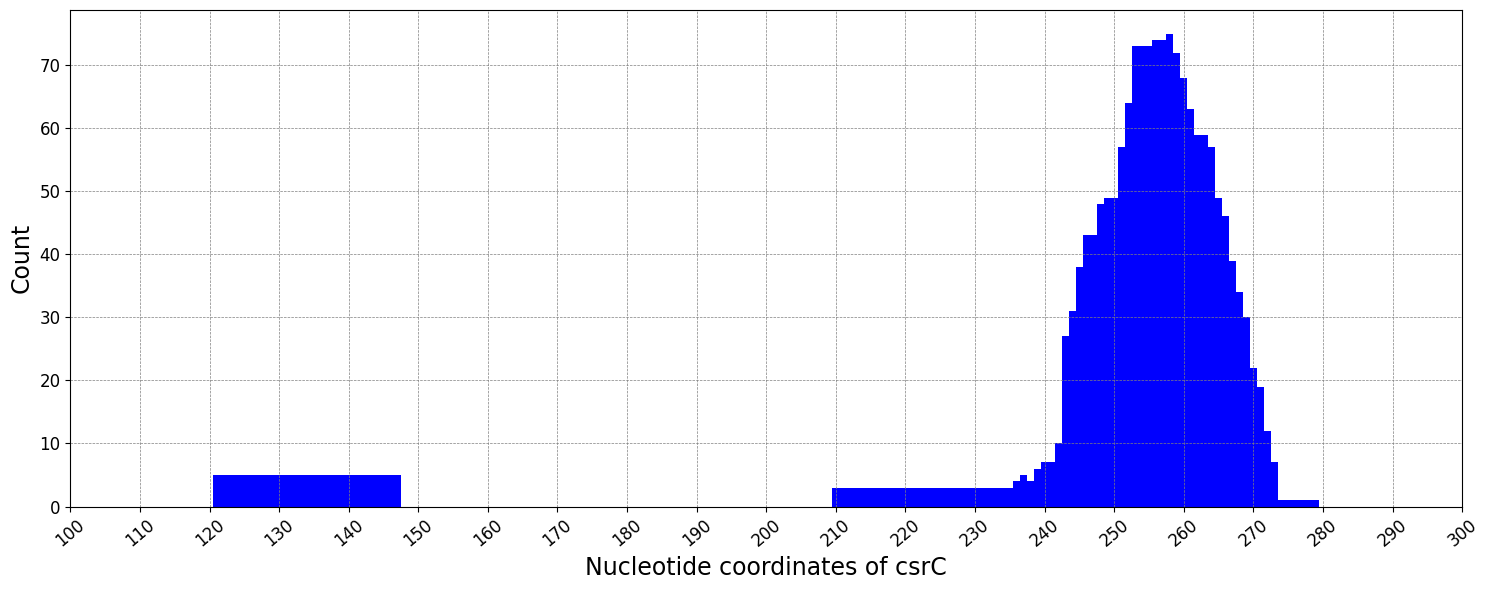

In [7]:
import matplotlib.pyplot as plt

# Load data from the file
data = []
with open('overlap_fragments.txt', 'r') as file:
    for line in file:
        # Assumes each line has four integers separated by spaces or commas
        start1, end1, start2, end2 = map(int, line.strip().split())
        data.append((start1, end1, start2, end2))

# Define the sequence length (assuming it is 435 as mentioned)
sequence_length = 435

# Initialize a coverage array with zeros
coverage = [0] * sequence_length

# Loop over each fragment pair and calculate the coverage
for start1, end1, start2, end2 in data:
    # Calculate the overlap between the two fragments
    overlap_start = max(start1, start2)
    overlap_end = min(end1, end2)

    # Increment the coverage for each position in the overlap range
    for pos in range(overlap_start, overlap_end + 1):
        if 0 <= pos < sequence_length:  # Ensure the position is within the valid range
            coverage[pos] += 1

# Plot the coverage as a bar graph
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(range(100, 300), coverage[100:300], color='blue', width=1)

# Set labels and title
ax.set_xlabel("Nucleotide coordinates of csrC", fontsize=17)
ax.set_ylabel("Count", fontsize=17)
plt.xlim(100, 300)
plt.xticks(list(range(100, 310, 10)), fontsize=12, rotation=40)
plt.yticks(list(range(0, 80, 10)), fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='y')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='x')

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
""" 332
ATGGCTTATA AACACATTCT CATCGCGGTC GACCTCTCCC CGGAAAGCAA AGTTCTGGTA 
GAGAAAGCAG TCTCTATGGC TCGCCCCTAC AATGCGAAAG TTTCTCTGAT CCACGTAGAT
GTAAACTACT CTGACCTATA CACCGGGCTT ATTGATGTGA ATCTGGGTGA TATGCAGAAA 180
CGCATCTCTG AAGAGACACA TCATGCACTG ACCGAGCTTT CCACTAATGC AGGCTACCCA 240
ATCACTGAAA CCCTGAGCGG CAGCGGCGAC CTGGGCCAGG TTCTGGTCGA TGCAATCAAG 300
AAATACGATA TGGATTTGGT GGTTTGTGGT CACCACCAGG ACTTCTGGAG CAAACTGATG 360
TCTTCCGCAC GTCAGCTGAT CAACACCGTT CACGTTGATA TGCTGATTGT TCCGCTGCGC 420
GACGAAGAAG AATAA 335
"""

'AGCGGCGAC CTGGGCCAGG TTCTGGTCGA TGCAATCAAG AAATACGATA T' #228-271
'AGCGGCGAC CTGGGCCAGG TTCTGGTCGA TGCAATCAAG AAATACGATA T'

'AGCGGCGAC CTGGGCCAGG TTCTGGTCGA TGCAATCAAG AAATACGATA T'